In [8]:
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal

In [1]:
image_paths = [
    'D:\\owd1\\Documents\\GitHub-REPO\\Senior-project\\Docs\\Row_Data\\UJ\\sentinel_casted_to_UInt16.tif',
    'D:\\owd1\\Documents\\GitHub-REPO\\Senior-project\\Docs\\Row_Data\\unis\\kau-sentinel_casted_to_UInt16.tif',
    'D:\\owd1\\Documents\\GitHub-REPO\\Senior-project\\Docs\\Row_Data\\unis\\kaust-sentinel_casted_to_UInt16.tif'
]

In [2]:
# Function to normalize array based on a given min and max value for display
def manual_normalize(array, min_val, max_val):
    array = np.clip(array, min_val, max_val)  # Clip to the specified range
    return (array - min_val) / (max_val - min_val)  # Normalize to [0, 1]


In [3]:
# Function to read a band from the dataset and convert it to float32
def read_band(ds, band_number):
    band = ds.GetRasterBand(band_number).ReadAsArray().astype(np.float32)
    return band

In [4]:
# Function to plot a single band
def plot_band(array, title='Band Image', cmap=None):
    plt.figure(figsize=(10, 10))
    plt.imshow(array, cmap=cmap)
    plt.title(title)
    plt.axis('off')  # Turn off the axis
    plt.show()

In [5]:
# Function to create an RGB composite image
def plot_rgb(ds, min_display_val, max_display_val):
    band_red = read_band(ds, 4)
    band_green = read_band(ds, 3)
    band_blue = read_band(ds, 2)

    n_band_red = manual_normalize(band_red, min_display_val, max_display_val)
    n_band_green = manual_normalize(band_green, min_display_val, max_display_val)
    n_band_blue = manual_normalize(band_blue, min_display_val, max_display_val)

    rgb = np.dstack((n_band_red, n_band_green, n_band_blue))
    plot_band(rgb, 'RGB Composite Image with Manual Normalization')


In [6]:
# Function to calculate and plot NDVI
def plot_ndvi(ds):
    red = read_band(ds, 4)  # Assuming Band 4 is Red
    nir = read_band(ds, 8)  # Assuming Band 8 is NIR
    ndvi = (nir - red) / (nir + red)
    plot_band(ndvi, 'NDVI Image', cmap='RdYlGn')

# Main code to open image and call plotting functions

C:\Users\owd1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\osgeo\gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


Number of bands in the image: 23


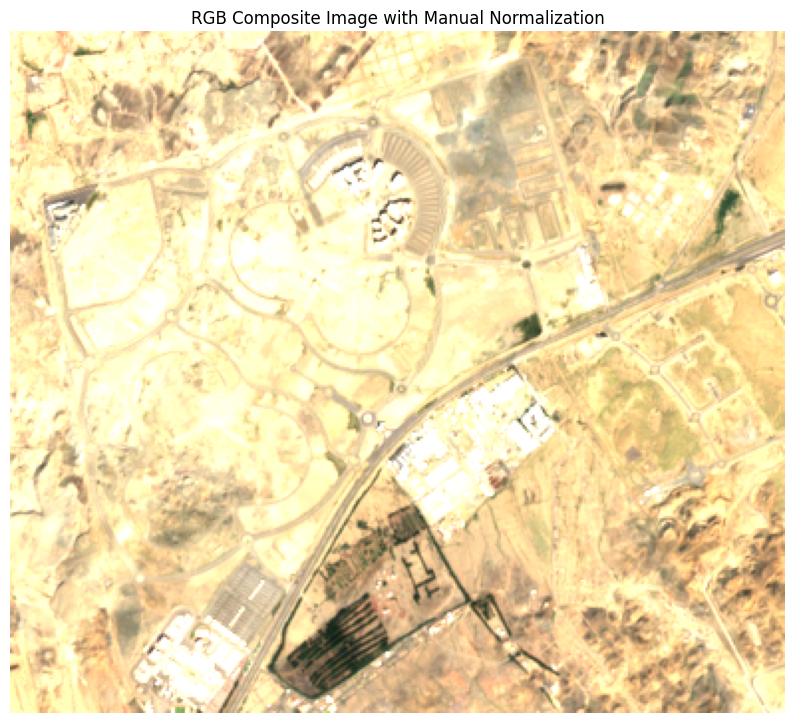

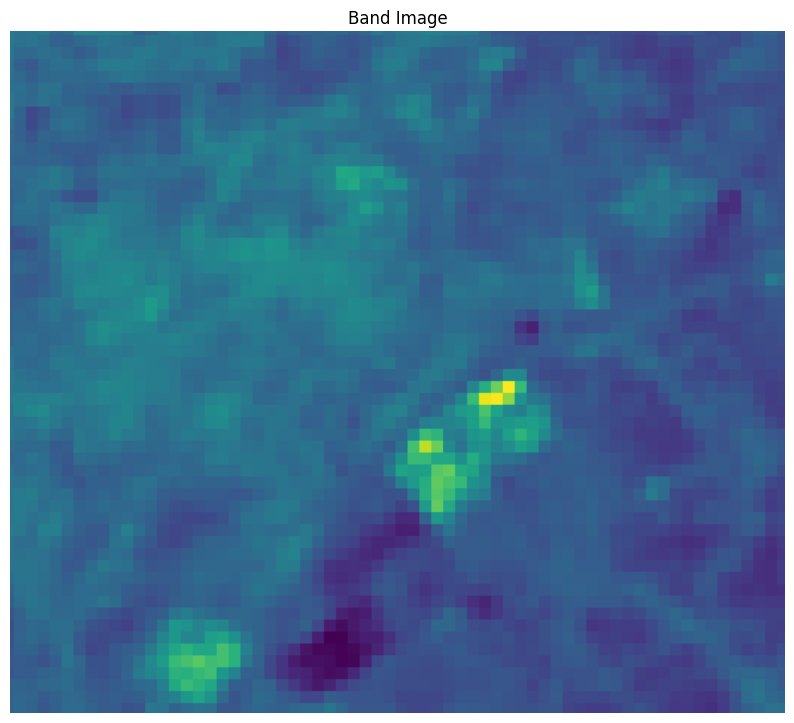

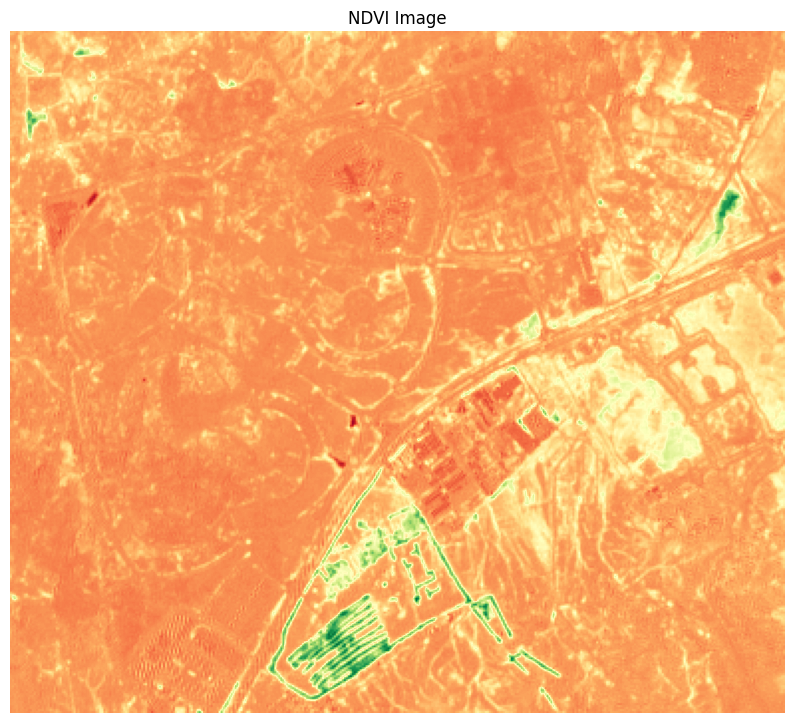

Number of bands in the image: 23


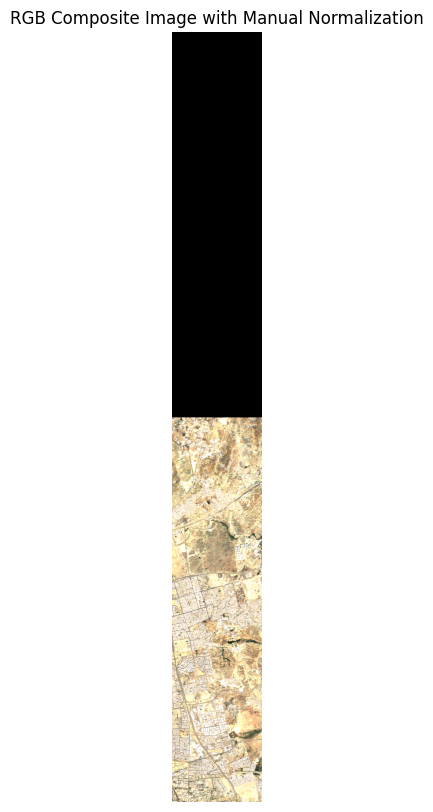

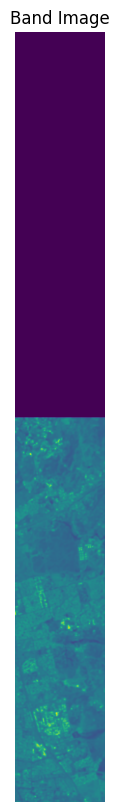

C:\Users\owd1\AppData\Local\Temp\ipykernel_19644\4008105281.py:5: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red) / (nir + red)


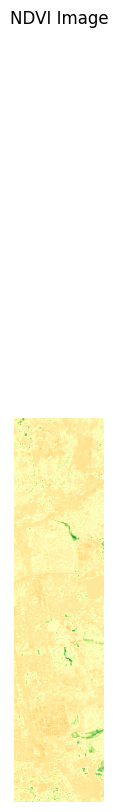

Number of bands in the image: 23


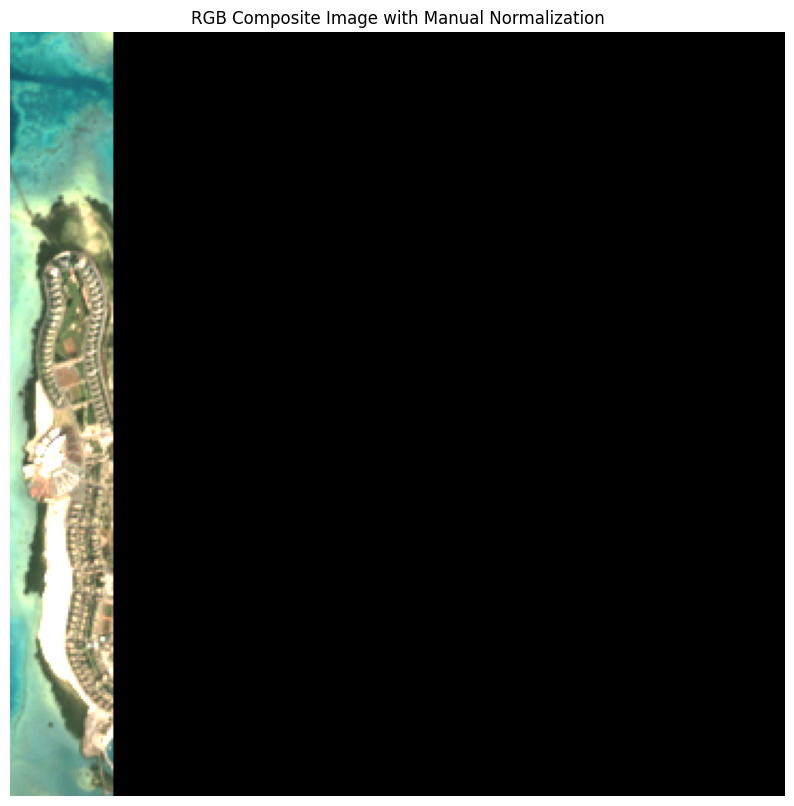

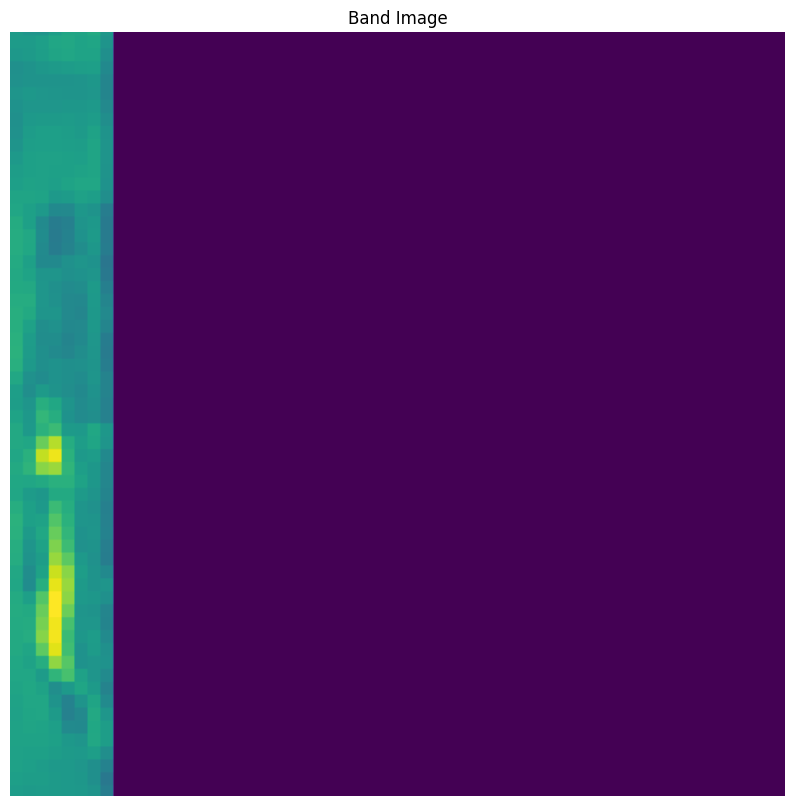

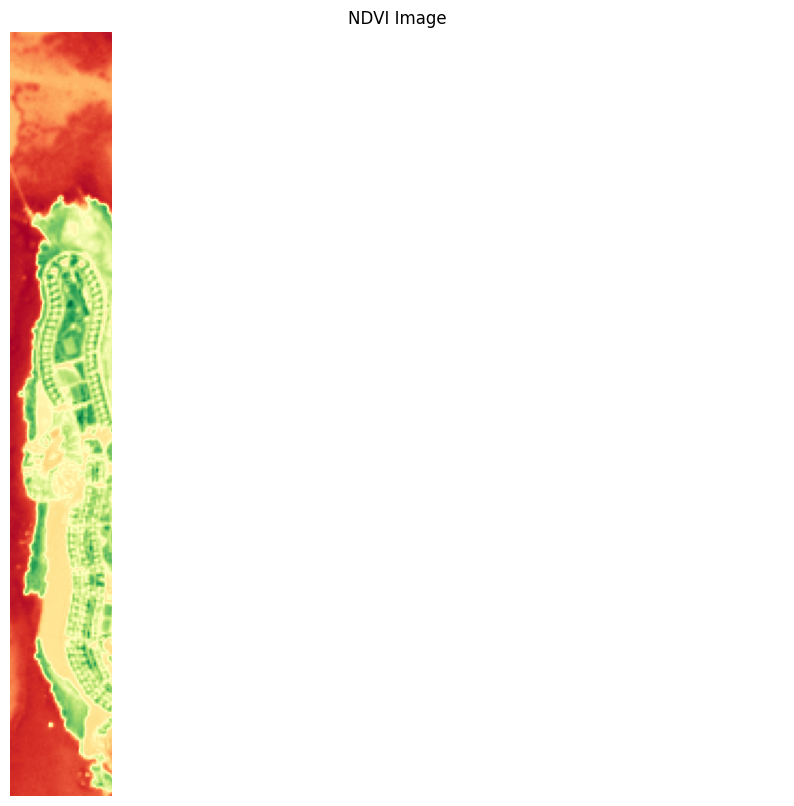

In [9]:
for image_path in image_paths:
    ds = gdal.Open(image_path)
    num_bands = ds.RasterCount
    print(f'Number of bands in the image: {num_bands}')
    
    # Plot RGB composite image
    min_display_val = 1000  # Example value, adjust based on your data
    max_display_val = 3000  # Example value, adjust based on your data
    plot_rgb(ds, min_display_val, max_display_val)

    # Plot a single band
    band_array = read_band(ds, 1)
    plot_band(band_array)



    # Plot NDVI
    plot_ndvi(ds)